In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time

C:\Users\mathi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mathi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
dict_cities = {}

Temperatures in Santiago, Chile, during July in 2024 and 2025.

In [6]:
cols_ordered = ['year','Month','day'] + [f'0{k}h' for k in range(10)] + [f'{k}h' for k in range(10,24)]

df = pd.DataFrame(columns = cols_ordered)


for year in range(2023,2025):
    
    data = []
    r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/1er/juillet/{year}/santiago-q-normal/85577.html')
    soup = BeautifulSoup(r.content,"html")
    list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
    list_spans = [elt for elt in list_spans if len(elt) > 0]
    data = [[float(elt[0].text) for elt in list_spans]]
    list_spans2 = [elt.find_all("span",attrs={"class":"tipsy-trigger"}) for elt in soup.find_all("th")]
    list_spans2 = [elt for elt in list_spans2 if len(elt) > 0]
    columns = [elt[0].text for elt in list_spans2]

    time.sleep(float(8 + 5 * np.random.rand(1)[0]))

    for day in range(2,32):
       r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/{day}/juillet/{year}/santiago-q-normal/85577.html')
       soup = BeautifulSoup(r.content,"html")
       list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
       list_spans = [elt for elt in list_spans if len(elt) > 0]
       data.append([float(elt[0].text) for elt in list_spans])
       time.sleep(float(8 + 5 * np.random.rand(1)))
        
    df1 = pd.DataFrame(data = data, columns = columns, index = range(1,len(data)+1))
    df1['year'] = year
    df1['Month'] = "July"
    df1['day'] = df1.index
    df1 = df1[cols_ordered]
    df = pd.concat([df,df1] , axis = 0)
    
dict_cities['Santiago'] = df    

C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\2008557886.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time.sleep(float(8 + 5 * np.random.rand(1)))
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\2008557886.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df1] , axis = 0)
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\2008557886.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. 

In [8]:
df.head()

,year,Month,day,00h,01h,02h,03h,04h,05h,06h,...,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h
1,2023,July,1,6.6,6.0,5.4,5.1,4.9,4.9,4.6,...,22.4,22.6,21.2,19.7,16.3,13.7,9.6,8.2,7.4,7.0
2,2023,July,2,7.1,6.9,8.0,7.3,7.6,7.7,7.4,...,10.1,10.5,11.1,10.6,7.9,6.0,13.0,10.9,8.9,7.9
3,2023,July,3,3.7,4.1,5.8,6.6,6.1,6.0,5.6,...,15.6,16.8,17.7,17.6,13.3,10.2,5.9,4.7,4.0,4.1
4,2023,July,4,6.1,5.5,5.9,5.3,5.3,5.2,4.1,...,16.7,17.5,16.5,15.7,13.6,11.1,9.3,7.5,7.0,6.8
5,2023,July,5,6.2,5.1,5.5,4.1,3.8,3.7,3.9,...,16.5,17.0,16.9,16.6,14.3,13.5,10.0,8.0,6.6,6.4


Average, min and max temperatures

In [12]:
df['Mean'] = df.iloc[:,3:].mean(axis = 1)

df['Min'] = df.iloc[:,3:].min(axis = 1)

df['Max'] = df.iloc[:,3:].max(axis = 1)

Commparison between 2023 and 2024

In [13]:
df.groupby("year")[["Mean","Min","Max"]].mean()

,Mean,Min,Max
year,,,
2023,10.296201,5.509677,17.106452
2024,8.090872,2.216129,16.880645


July 2024 has been colder that july 2023

Temperatures in Curico, Chile, during July in 2023 and in 2024.

In [14]:
cols_ordered = ['year','Month','day'] + [f'0{k}h' for k in range(10)] + [f'{k}h' for k in range(10,24)]

df = pd.DataFrame(columns = cols_ordered)


for year in range(2023,2025):
    
    data = []
    r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/1er/juillet/{year}/curico/85629.html')
    soup = BeautifulSoup(r.content,"html")
    list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
    list_spans = [elt for elt in list_spans if len(elt) > 0]
    data = [[float(elt[0].text) for elt in list_spans]]
    list_spans2 = [elt.find_all("span",attrs={"class":"tipsy-trigger"}) for elt in soup.find_all("th")]
    list_spans2 = [elt for elt in list_spans2 if len(elt) > 0]
    columns = [elt[0].text for elt in list_spans2]

    time.sleep(float(8 + 5 * np.random.rand(1)))

    for day in range(2,32):
       r = r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/{day}/juillet/{year}/curico/85629.html')
       soup = BeautifulSoup(r.content,"html")
       list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
       list_spans = [elt for elt in list_spans if len(elt) > 0]
       data.append([float(elt[0].text) for elt in list_spans])
       time.sleep(float(8 + 5 * np.random.rand(1)))
        
    df1 = pd.DataFrame(data = data, columns = columns, index = range(1,len(data)+1))
    df1['year'] = year
    df1['Month'] = "Jully"
    df1['day'] = df1.index
    df1 = df1[cols_ordered]
    df = pd.concat([df,df1] , axis = 0)
    
dict_cities['Curico'] = df    

C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\506084562.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time.sleep(float(8 + 5 * np.random.rand(1)))
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\506084562.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time.sleep(float(8 + 5 * np.random.rand(1)))
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\506084562.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entrie

In [15]:
df.head()

,year,Month,day,00h,01h,02h,03h,04h,05h,06h,...,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h
1,2023,Jully,1,7.3,6.5,6.4,6.0,5.8,4.8,4.5,...,17.0,18.0,18.9,17.5,14.9,12.8,11.8,10.8,9.1,7.8
2,2023,Jully,2,9.3,9.3,10.2,10.4,10.1,9.9,9.8,...,13.2,13.3,13.3,13.2,12.8,12.6,12.5,11.5,10.7,10.2
3,2023,Jully,3,11.5,11.4,11.3,11.2,11.0,10.8,11.2,...,16.5,16.9,17.0,15.9,14.5,13.3,12.5,12.4,12.4,12.0
4,2023,Jully,4,11.0,11.4,11.6,11.3,11.5,11.8,10.8,...,14.6,15.1,15.3,14.8,13.8,13.1,13.1,11.7,10.6,10.9
5,2023,Jully,5,9.3,10.8,8.9,8.8,6.9,6.6,6.3,...,13.1,13.6,13.8,13.4,12.4,11.7,12.8,11.5,9.6,8.4


Average, min and max temperatures

In [16]:
df['Mean'] = df.iloc[:,3:].mean(axis = 1)

df['Min'] = df.iloc[:,3:].min(axis = 1)

df['Max'] = df.iloc[:,3:].max(axis = 1)

In [17]:
df.groupby("year")[['Mean','Min','Max']].mean()

,Mean,Min,Max
year,,,
2023,9.473439,6.348387,13.616129
2024,5.055780,1.074194,10.641935


July 2024 has been colder that july 2023

Temperatures in Perpignan, France, during January in 2024 and in 2025.

In [18]:
cols_ordered = ['year','Month','day'] + [f'0{k}h' for k in range(10)] + [f'{k}h' for k in range(10,24)]

df = pd.DataFrame(columns = cols_ordered)


for year in range(2024,2026):
    
    data = []
    r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/1er/janvier/{year}/perpignan-rivesaltes/07747.html')
    soup = BeautifulSoup(r.content,"html")
    list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
    list_spans = [elt for elt in list_spans if len(elt) > 0]
    data = [[float(elt[0].text) for elt in list_spans]]
    list_spans2 = [elt.find_all("span",attrs={"class":"tipsy-trigger"}) for elt in soup.find_all("th")]
    list_spans2 = [elt for elt in list_spans2 if len(elt) > 0]
    columns = [elt[0].text for elt in list_spans2]

    time.sleep(float(8 + 5 * np.random.rand(1)))

    for day in range(2,32):
       r = requests.get(f'https://www.infoclimat.fr/observations-meteo/archives/{day}/janvier/{year}/perpignan-rivesaltes/07747.html')
       soup = BeautifulSoup(r.content,"html")
       list_spans = [elt.find_all("span",attrs={"style":"font-weight:bold;display:inline-block;font-size:16px"}) \
              for elt in soup.find_all("td",attrs={"style":"/*background-color:rgba(0,0,0,0.1)*/"})]
       list_spans = [elt for elt in list_spans if len(elt) > 0]
       data.append([float(elt[0].text) for elt in list_spans])
       time.sleep(float(8 + 5 * np.random.rand(1)))
        
    df1 = pd.DataFrame(data = data, columns = columns, index = range(1,len(data)+1))
    df1['year'] = year
    df1['Month'] = "January"
    df1['day'] = df1.index
    df1 = df1[cols_ordered]
    df = pd.concat([df,df1] , axis = 0)
    
dict_cities['Perpignan'] = df    

C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\3929434583.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time.sleep(float(8 + 5 * np.random.rand(1)))
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\3929434583.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time.sleep(float(8 + 5 * np.random.rand(1)))
C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\3929434583.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant ent

In [19]:
df.head()

,year,Month,day,00h,01h,02h,03h,04h,05h,06h,...,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h
1,2024,January,1,5.2,12.0,11.7,10.9,9.8,9.4,7.5,...,15.3,15.7,15.7,14.2,10.6,8.7,6.9,7.1,6.0,5.3
2,2024,January,2,6.7,4.3,3.9,3.7,2.9,2.6,3.3,...,10.3,11.3,10.8,10.4,9.0,8.2,8.2,8.2,8.5,7.5
3,2024,January,3,15.1,6.4,6.0,4.7,4.0,4.2,5.4,...,18.1,19.1,17.5,16.5,15.4,14.7,14.9,14.3,15.0,15.1
4,2024,January,4,11.3,14.4,13.9,13.8,12.9,11.9,11.3,...,16.6,13.8,13.7,13.9,12.8,12.3,12.2,11.5,11.9,12.0
5,2024,January,5,9.7,10.0,9.6,9.0,9.1,9.1,8.6,...,12.0,11.9,11.2,10.7,10.4,10.3,10.1,10.1,9.9,9.7


In [20]:
df['Mean'] = df.iloc[:,3:].mean(axis = 1)

df['Min'] = df.iloc[:,3:].min(axis = 1)

df['Max'] = df.iloc[:,3:].max(axis = 1)

In [21]:
df.groupby("year")[['Mean','Min','Max']].mean()

,Mean,Min,Max
year,,,
2024,9.542876,5.300000,14.296774
2025,9.184543,4.680645,13.974194


We compare the average temperature of the three cities at each hour.

In [22]:
import matplotlib.pyplot as plt

C:\Users\mathi\AppData\Local\Temp\ipykernel_60768\121480516.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


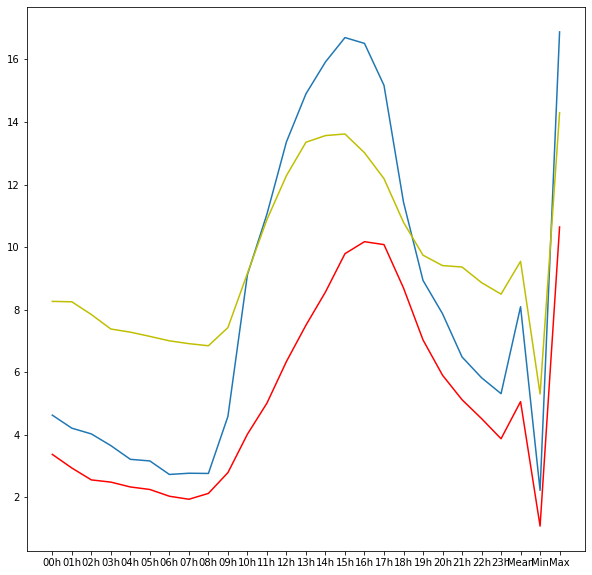

In [29]:
fig,ax = plt.subplots(figsize=(10,10))

df = dict_cities['Santiago']
df = df[df.year == 2024]
ax.plot(df.iloc[:,3:].mean())
df = dict_cities['Curico']
df = df[df.year == 2024]
ax.plot(df.iloc[:,3:].mean(),c="r")
df = dict_cities['Perpignan']
df = df[df.year == 2024]
ax.plot(df.iloc[:,3:].mean(),c='y')

fig.show()